In [3]:
# Install libraries in Jupyter Notebook
!pip install pandas matplotlib seaborn scikit-learn numpy


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [17]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'world_economic_indicators.csv'  # Update with your file path if different
economic_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Loaded. First 5 rows:")
economic_data.head()


Dataset Loaded. First 5 rows:


,Country Name,Country Code,Year,"Personal remittances, received (% of GDP)","Unemployment, total (% of total labor force)",GDP (current US$)_x,GDP growth (annual %)_x,GDP (current US$)_y,GDP growth (annual %)_y
0,Aruba,ABW,1960,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,NaN,NaN,2.112502e+10,NaN,2.112502e+10,NaN
2,Afghanistan,AFG,1960,NaN,NaN,5.377778e+08,NaN,5.377778e+08,NaN
3,Africa Western and Central,AFW,1960,NaN,NaN,1.044764e+10,NaN,1.044764e+10,NaN
4,Angola,AGO,1960,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Cleaning the dataset
# Dropping duplicate columns
economic_data_cleaned = economic_data.drop(columns=['GDP (current US$)_y', 'GDP growth (annual %)_y'], errors='ignore')

# Renaming columns for clarity
economic_data_cleaned.rename(columns={
    'GDP (current US$)_x': 'GDP (current USD)',
    'GDP growth (annual %)_x': 'GDP growth (annual %)'
}, inplace=True)

# Dropping rows with missing values in key indicators
economic_data_cleaned = economic_data_cleaned.dropna(subset=[
    'GDP (current USD)', 
    'GDP growth (annual %)', 
    'Unemployment, total (% of total labor force)'
])

# Display the cleaned data structure
print("Dataset cleaned. First 5 rows:")
economic_data_cleaned.head()


Dataset cleaned. First 5 rows:


,Country Name,Country Code,Year,"Personal remittances, received (% of GDP)","Unemployment, total (% of total labor force)",GDP (current USD),GDP growth (annual %)
8247,Africa Eastern and Southern,AFE,1991,0.713281,7.333336,2.768570e+11,0.136909
8249,Africa Western and Central,AFW,1991,0.649091,4.224595,1.180400e+11,1.110253
8250,Angola,AGO,1991,NaN,4.489000,1.270456e+10,0.991359
8251,Albania,ALB,1991,NaN,10.307000,1.099559e+09,-28.002142
8253,Arab World,ARB,1991,NaN,11.663443,4.718000e+11,2.434688


Matplotlib is building the font cache; this may take a moment.
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3

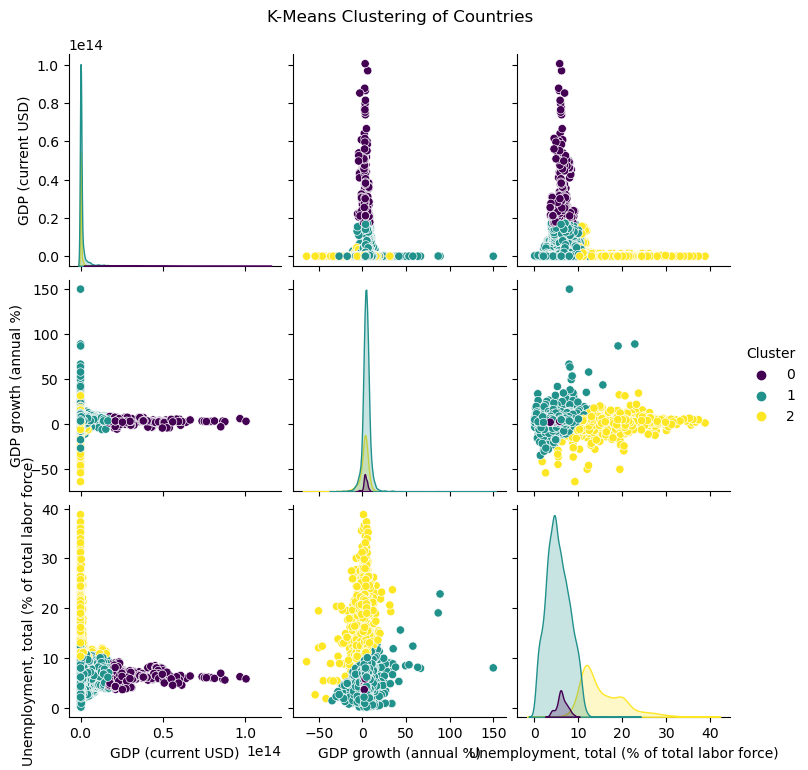

In [21]:
# Import necessary libraries for clustering
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for clustering
clustering_data = economic_data_cleaned[['GDP (current USD)', 'GDP growth (annual %)', 
                                         'Unemployment, total (% of total labor force)']]

# Normalize the data for clustering
clustering_data_normalized = (clustering_data - clustering_data.mean()) / clustering_data.std()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
economic_data_cleaned['Cluster'] = kmeans.fit_predict(clustering_data_normalized)

# Visualize the clusters
sns.pairplot(economic_data_cleaned, hue='Cluster', vars=['GDP (current USD)', 'GDP growth (annual %)', 
                                                         'Unemployment, total (% of total labor force)'],
             palette='viridis', diag_kind='kde')
plt.suptitle("K-Means Clustering of Countries", y=1.02)
plt.show()


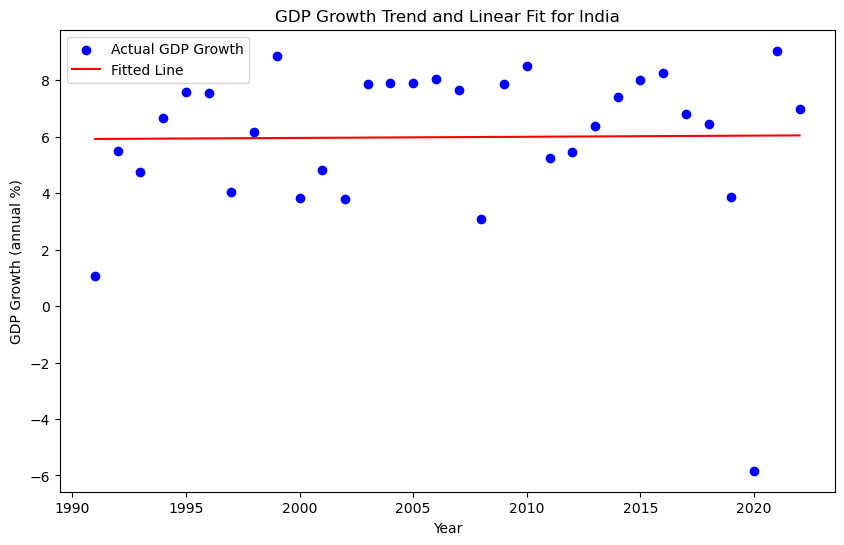

In [23]:
# Import necessary library for regression
from sklearn.linear_model import LinearRegression
import numpy as np

# Filter the data for a specific country (e.g., Afghanistan)
country_name = 'India'  # Change to your desired country
country_data = economic_data_cleaned[economic_data_cleaned['Country Name'] == country_name]

# Check if the country has sufficient data
if country_data.empty:
    print(f"No data available for {country_name}. Please choose a different country.")
else:
    # Prepare the data for line fitting
    X = country_data['Year'].values.reshape(-1, 1)  # Reshape year for model input
    y = country_data['GDP growth (annual %)'].values

    # Perform Linear Regression
    model = LinearRegression()
    model.fit(X, y)

    # Predict GDP growth
    predicted_growth = model.predict(X)

    # Plot the original data and the fitted line
    plt.figure(figsize=(10, 6))
    plt.scatter(country_data['Year'], y, color='blue', label='Actual GDP Growth')
    plt.plot(country_data['Year'], predicted_growth, color='red', label='Fitted Line')
    plt.xlabel('Year')
    plt.ylabel('GDP Growth (annual %)')
    plt.title(f'GDP Growth Trend and Linear Fit for {country_name}')
    plt.legend()
    plt.show()
